# The Virtual DataFrame

The Virtual DataFrame (vDataFrame) is the core object of the VerticaPy library. Leveraging the power of Vertica and the flexibility of Python, the vDataFrame is a Python object that lets you manipulate the data representation in a Vertica database without modifying the underlying data. The data represented by a vDataFrame remains in the Vertica database, bypassing the limitations of working memory. When a vDataFrame is created or altered, VerticaPy formulates the operation as an SQL query and pushes the computation to the Vertica database, harnessing Vertica's massive parallel processing and in-built functions. Vertica then aggregates and returns the result to VerticaPy. In essence, vDataFrames behave similar to [views](https://docs.vertica.com/latest/en/data-analysis/views/) in the Vertica database.

For more information about Vertica's performance advantages, including its columnar orientation and parallelization across nodes, see the [Vertica documentation](https://docs.vertica.com/latest/en/architecture/).

In the following tutorial, we will introduce the basic functionality of the vDataFrame and then explore the ways in which they utilize in-database processing to enhance performance. 

## Creating vDataFrames

First, run the [load_titanic()](https://www.vertica.com/python/documentation/1.0.x/html/api/verticapy.datasets.load_titanic.html) function to ingest into Vertica a dataset with information about titanic passengers:

,123pclassInteger,123survivedInteger,AbcVarchar(164),AbcsexVarchar(20),123ageNumeric(8),123sibspInteger,123parchInteger,AbcticketVarchar(36),123fareNumeric(12),AbccabinVarchar(30),AbcembarkedVarchar(20),AbcboatVarchar(100),123bodyInteger,AbcVarchar(100)
1,1,0,,male,47.0,1,0,PC 17757,227.525,C62 C64,C,[null],124,
2,1,0,,male,24.0,0,1,PC 17558,247.5208,B58 B60,C,[null],[null],
3,1,0,,male,25.0,0,0,13905,26.0,[null],C,[null],148,
4,1,0,,male,42.0,0,0,110489,26.55,D22,S,[null],[null],
5,1,0,,male,45.0,0,0,113050,26.55,B38,S,[null],[null],
6,1,0,,male,46.0,1,0,W.E.P. 5734,61.175,E31,S,[null],[null],
7,1,0,,male,64.0,1,4,19950,263.0,C23 C25 C27,S,[null],[null],
8,1,0,,male,[null],0,0,113796,42.4,[null],S,[null],[null],
9,1,0,,male,32.5,0,0,113503,211.5,C132,C,[null],45,
10,1,0,,male,55.0,0,0,113787,30.5,C30,S,[null],[null],

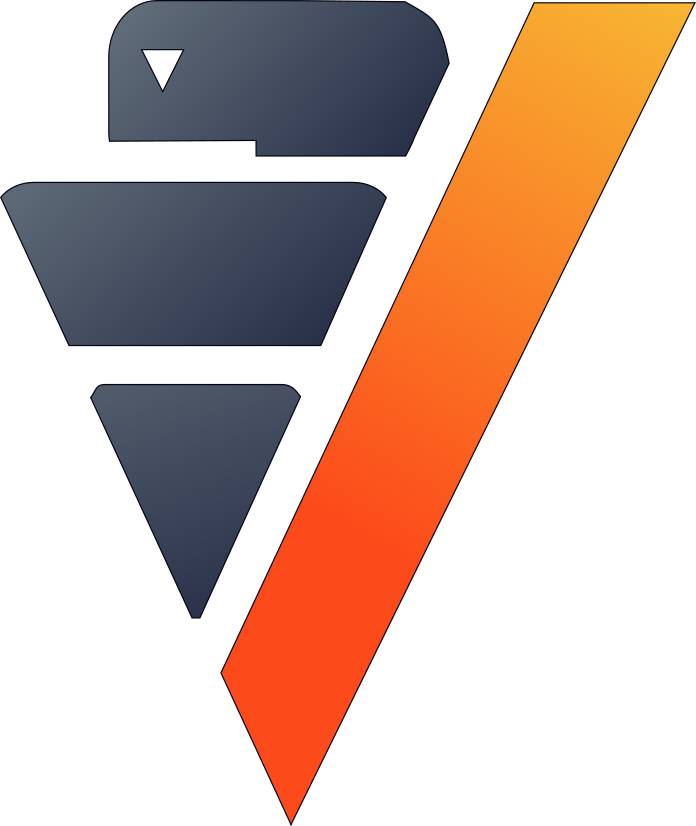

In [2]:
from verticapy.datasets import load_titanic

# By default, the table is created in the `public` schema
load_titanic()

You can create a vDataFrame from either an existing relation or a customized relation.

To create a vDataFrame using an existing relation, in this case the Titanic dataset, provide the name of the dataset:

,123pclassInteger,123survivedInteger,AbcVarchar(164),AbcsexVarchar(20),123ageNumeric(8),123sibspInteger,123parchInteger,AbcticketVarchar(36),123fareNumeric(12),AbccabinVarchar(30),AbcembarkedVarchar(20),AbcboatVarchar(100),123bodyInteger,AbcVarchar(100)
1,1,0,,male,47.0,1,0,PC 17757,227.525,C62 C64,C,[null],124,
2,1,0,,male,24.0,0,1,PC 17558,247.5208,B58 B60,C,[null],[null],
3,1,0,,male,25.0,0,0,13905,26.0,[null],C,[null],148,
4,1,0,,male,42.0,0,0,110489,26.55,D22,S,[null],[null],
5,1,0,,male,45.0,0,0,113050,26.55,B38,S,[null],[null],
6,1,0,,male,46.0,1,0,W.E.P. 5734,61.175,E31,S,[null],[null],
7,1,0,,male,64.0,1,4,19950,263.0,C23 C25 C27,S,[null],[null],
8,1,0,,male,[null],0,0,113796,42.4,[null],S,[null],[null],
9,1,0,,male,32.5,0,0,113503,211.5,C132,C,[null],45,
10,1,0,,male,55.0,0,0,113787,30.5,C30,S,[null],[null],

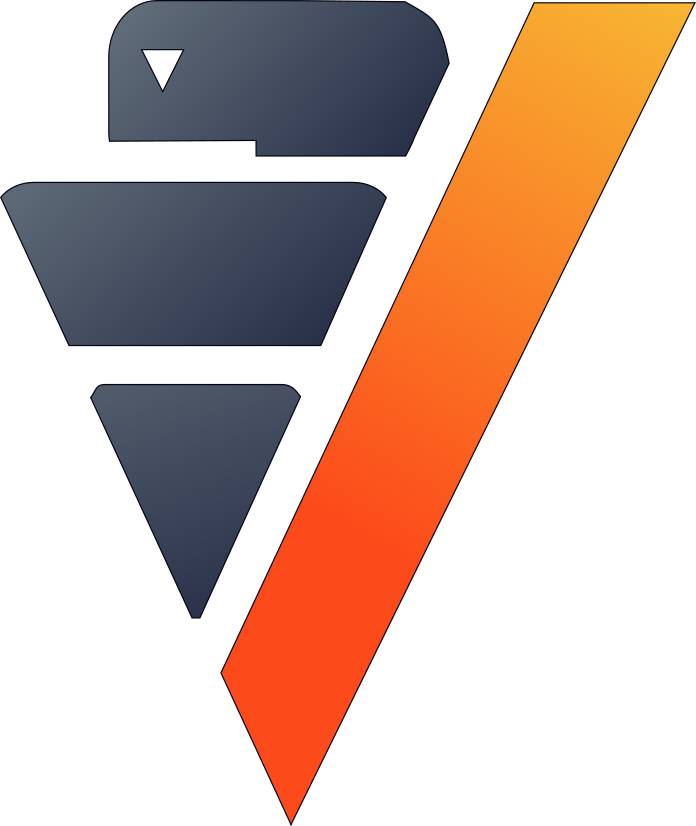

In [3]:
import verticapy as vp

vp.vDataFrame("public.titanic")

To create a vDataFrame using a customized relation, specify the SQL query for that relation as the argument:

,123pclassInteger,123survivedFloat(22)
1,2,0.416988416988417
2,1,0.612179487179487
3,3,0.227752639517345

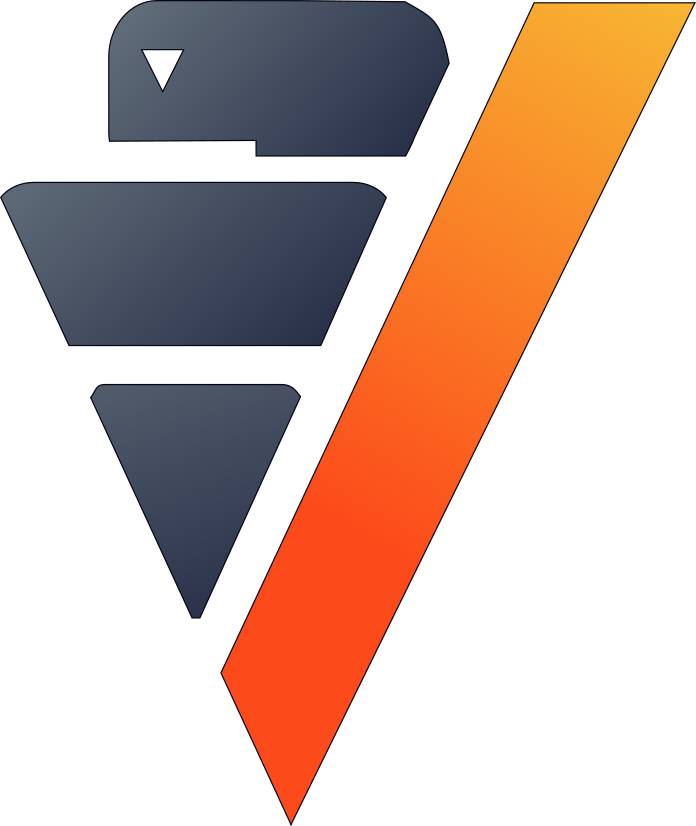

In [4]:
vp.vDataFrame("SELECT pclass, AVG(survived) AS survived FROM titanic GROUP BY 1")

For more examples of creating vDataFrames, see [the vDataFrame reference page](https://www.vertica.com/python/documentation/1.0.x/html/vdataframe.html#examples).

## Loading and processing in-memory vs. in-database

The following examples demonstrate the performance advantages of loading and processing data in-database versus in-memory.

First, we download the [Expedia](https://www.kaggle.com/competitions/expedia-hotel-recommendations/data) dataset from Kaggle and then load it into Vertica:

> **_NOTE:_**  You might need to change the value of the `path` agrument for the `read_csv` function, depending on where your data file is located.

In [ ]:
vp.read_csv("train.csv", schema = "public", parse_nrows = 20000000)

Once the data is loaded into the Vertica database, we can create a vDataFrame using the relation that contains the Expedia dataset:

elapsed time = 0.15794777870178223


,📅date_timeTimestamp(29),123site_nameInteger,123posa_continentInteger,123user_location_countryInteger,123user_location_regionInteger,123user_location_cityInteger,123orig_destination_distanceNumeric(14),123user_idInteger,123is_mobileInteger,123is_packageInteger,123channelInteger,📅srch_ciDate,📅srch_coDate,123srch_adults_cntInteger,123srch_children_cntInteger,123srch_rm_cntInteger,123srch_destination_idInteger,123srch_destination_type_idInteger,123is_bookingInteger,123cntInteger,123hotel_continentInteger,123hotel_countryInteger,123hotel_marketInteger,123hotel_clusterInteger
1,2013-01-07 00:00:28,2,3,66,356,4779,4948.1861,593375,0,0,9,2013-05-09,2013-05-10,4,0,2,2763,3,0,2,6,70,1901,2
2,2013-01-07 00:01:34,2,3,66,356,4779,4948.1861,593375,0,0,9,2013-05-09,2013-05-10,2,0,1,2763,3,0,3,6,70,1901,2
3,2013-01-07 00:01:45,2,3,66,294,7976,509.4848,1197968,0,0,9,2013-01-16,2013-01-18,1,0,1,5811,3,0,4,2,50,350,76
4,2013-01-07 00:01:53,24,2,3,49,19105,[null],1174819,0,0,9,2013-04-25,2013-04-28,2,0,1,14908,1,0,3,3,88,1032,5
5,2013-01-07 00:02:24,11,3,205,155,14703,796.3281,1128575,0,0,9,2013-01-19,2013-01-22,1,0,1,25064,6,0,1,2,50,1230,4
6,2013-01-07 00:02:43,2,3,66,462,14703,2605.4093,614322,0,0,1,2013-01-08,2013-01-15,2,0,1,13094,3,0,1,2,50,212,40
7,2013-01-07 00:02:43,24,2,66,346,31371,384.0182,1162059,1,0,2,2013-01-11,2013-01-14,3,1,1,14985,1,0,1,2,50,1241,99
8,2013-01-07 00:03:35,2,3,70,47,14566,[null],598076,0,0,9,2013-01-12,2013-01-13,6,1,3,8220,1,0,2,3,182,46,46
9,2013-01-07 00:03:41,2,3,66,174,21177,5713.6394,13796,0,0,9,2013-01-19,2013-01-26,1,0,1,8821,1,0,1,6,17,30,67
10,2013-01-07 00:04:33,2,3,3,50,31800,[null],192004,0,0,9,2013-02-24,2013-02-28,1,1,1,22238,6,0,2,6,77,2,6

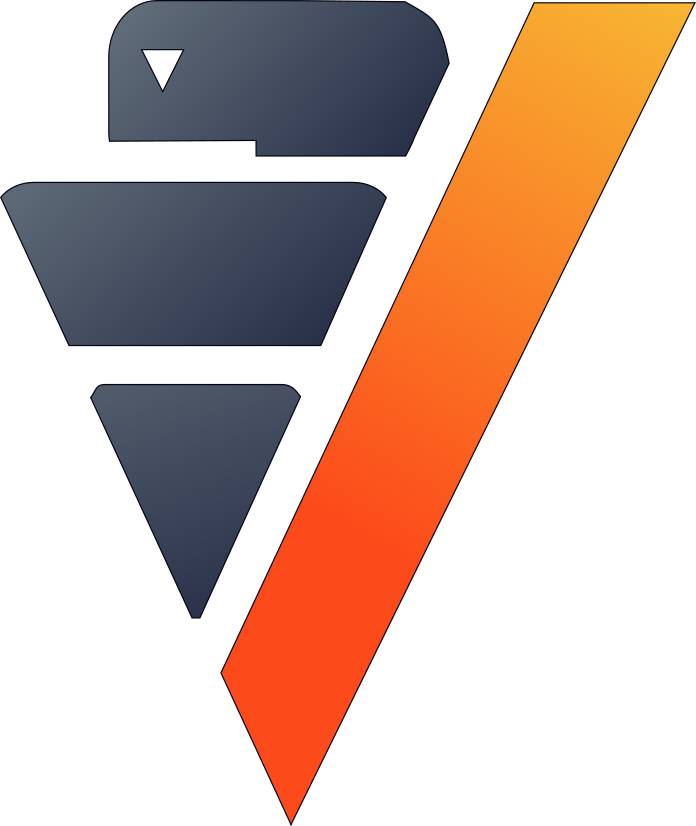

In [6]:
import time

start_time = time.time()
expedia = vp.vDataFrame("public.train")
print("elapsed time = {}".format(time.time() - start_time))
display(expedia)

The vDataFrame was created in about a second. All the data—about 4GB—is stored in Vertica, requiring no in-memory data loading.

Now, to compare the above result with in-memory loading, we load about half the dataset into pandas:

> **_NOTE:_** This process is expensive on local machines, so avoid running the following code if your computer has less than 2GB of memory.

In [7]:
import pandas as pd

L_nrows = [10000, 100000, 1000000, 2000000, 5000000, 10000000, 20000000]
L_time = []
for nrows in L_nrows:
    start_time = time.time()
    expedia_df = pd.read_csv("train.csv", nrows = nrows)
    elapsed_time = time.time() - start_time
    L_time.append(elapsed_time)
    print("nrows = {}; elapsed time = {}".format(nrows, elapsed_time))

nrows = 10000; elapsed time = 0.03764772415161133
nrows = 100000; elapsed time = 0.19388937950134277
nrows = 1000000; elapsed time = 1.8165876865386963
nrows = 2000000; elapsed time = 3.613091230392456
nrows = 5000000; elapsed time = 8.884109735488892
nrows = 10000000; elapsed time = 19.819123029708862
nrows = 20000000; elapsed time = 62.796350717544556


It took about a minute to load half the dataset into memory. Compared with the one second required to create the vDataFrame on the entire dataset in-database, in-memory loading is magnitudes more expensive. Loading data into pandas is quite fast when the data volume is low (less than some MB), but as the size of the dataset increases, the load time can become exponentially more expensive, as seen in the following plot:

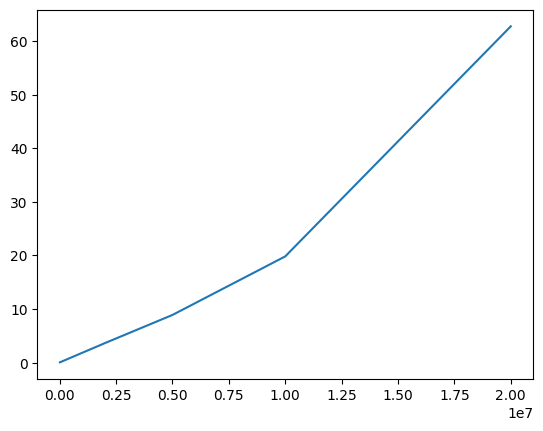

In [8]:
import matplotlib.pyplot as plt
plt.plot(L_nrows, L_time)
plt.show()

Even after the data is loaded into memory, the performance is very slow. The following example removes non-numeric columns from the dataset, then computes a correlation matrix:

In [9]:
columns_to_drop = ['date_time', 'srch_ci', 'srch_co'] 
expedia_df = expedia_df.drop(columns_to_drop, axis=1)

In [10]:
start_time = time.time()
expedia_df.corr()
print(f"elapsed time = {time.time() - start_time}")

elapsed time = 20.517507791519165


The operation took about 20 seconds. Let's compare the performance in-database using a vDataFrame to compute the correlation matrix of the entire dataset:

,123site_nameInteger,123posa_continentInteger,123user_location_countryInteger,123user_location_regionInteger,123user_location_cityInteger,123orig_destination_distanceNumeric(14),123user_idInteger,123is_mobileInteger,123is_packageInteger,123channelInteger,123srch_adults_cntInteger,123srch_children_cntInteger,123srch_rm_cntInteger,123srch_destination_idInteger,123srch_destination_type_idInteger,123is_bookingInteger,123cntInteger,123hotel_continentInteger,123hotel_countryInteger,123hotel_marketInteger,123hotel_clusterInteger
1,2,3,66,448,50947,1892.1183,1082027,0,0,9,3,0,1,12811,5,0,1,4,57,172,82
2,24,2,3,50,5703,[null],229916,0,0,4,1,0,1,8744,1,0,1,3,106,108,85
3,2,3,66,442,18617,[null],1080633,0,1,9,1,1,1,8223,1,0,1,2,50,690,98
4,2,3,66,448,24848,2270.5665,445852,0,0,9,1,0,1,8278,1,0,1,2,50,368,68
5,40,3,66,314,4868,3831.1887,775452,0,1,5,0,0,1,8745,1,1,1,6,204,27,5
6,2,3,66,448,50947,790.8617,656916,0,1,1,2,1,1,14840,1,1,1,2,50,1629,90
7,2,3,66,435,14812,[null],1120833,0,1,9,0,0,1,18046,1,0,1,6,105,1808,43
8,37,1,198,153,17956,[null],695183,0,0,9,1,0,1,8264,1,0,1,5,108,1568,38
9,2,3,115,957,17195,[null],932702,0,0,9,1,0,1,268,1,0,2,3,99,1033,60
10,2,3,66,348,48862,206.7024,829823,0,0,1,1,0,1,17918,4,0,2,2,50,191,69

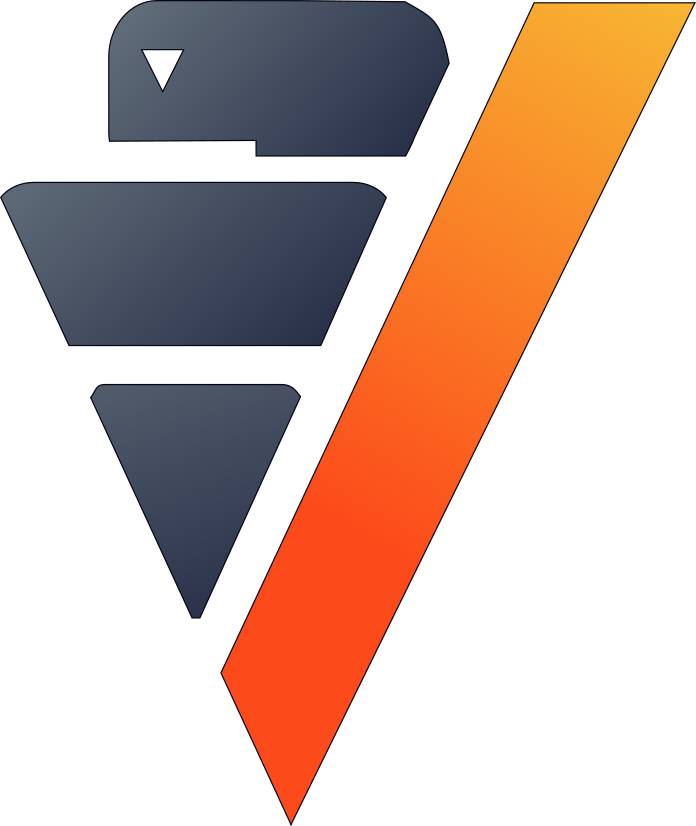

In [11]:
# Remove non-numeric columns
expedia.drop(columns = ['date_time', 'srch_ci', 'srch_co'])

In [12]:
start_time = time.time()
expedia.corr(show = False)
print(f"elapsed time = {time.time() - start_time}")

elapsed time = 23.69867491722107


In just over 20 seconds, VerticaPy computes the correlation matrix on the entire dataset. Compared to the 20 seconds it took to compute the correlation matrix on half the dataset in-memory, this is huge improvement. Using other Vertica-specific features, such as projections, we could further enhance this performance.  

VerticaPy also caches the computed aggregations. With this cache available, we can repeat the correlation matrix computation almost instantaneously:

> **_NOTE:_** If necessary, you can deactivate the cache by calling the [set_option()](https://www.vertica.com/python/documentation/1.0.x/html/api/verticapy.set_option.html) function with the `cache` parameter set to False.

In [13]:
start_time = time.time()
expedia.corr(show = False)
print(f"elapsed time = {time.time() - start_time}")

100%|██████████| 20/20 [00:00<00:00, 800.07it/s]

elapsed time = 0.31166625022888184


## Memory usage in-memory vs. in-database

Now, we will examine how the memory usage compares between in-memory and in-database.

First, use the pandas `info()` method to explore the DataFrame's memory usage:

In [14]:
expedia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000000 entries, 0 to 19999999
Data columns (total 21 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   site_name                  int64  
 1   posa_continent             int64  
 2   user_location_country      int64  
 3   user_location_region       int64  
 4   user_location_city         int64  
 5   orig_destination_distance  float64
 6   user_id                    int64  
 7   is_mobile                  int64  
 8   is_package                 int64  
 9   channel                    int64  
 10  srch_adults_cnt            int64  
 11  srch_children_cnt          int64  
 12  srch_rm_cnt                int64  
 13  srch_destination_id        int64  
 14  srch_destination_type_id   int64  
 15  is_booking                 int64  
 16  cnt                        int64  
 17  hotel_continent            int64  
 18  hotel_country              int64  
 19  hotel_market               int64  
 20  

The DataFrame is using 3.1GB to store half the Expedia dataset. Use the `memory_usage()` method to list the `expedia` vDataFrame's memory usage:

,value
object,1039
"""site_name""",1727
"""posa_continent""",1732
"""user_location_country""",1739
"""user_location_region""",1738
"""user_location_city""",1736
"""orig_destination_distance""",1743
"""user_id""",1725
"""is_mobile""",1727
"""is_package""",1728

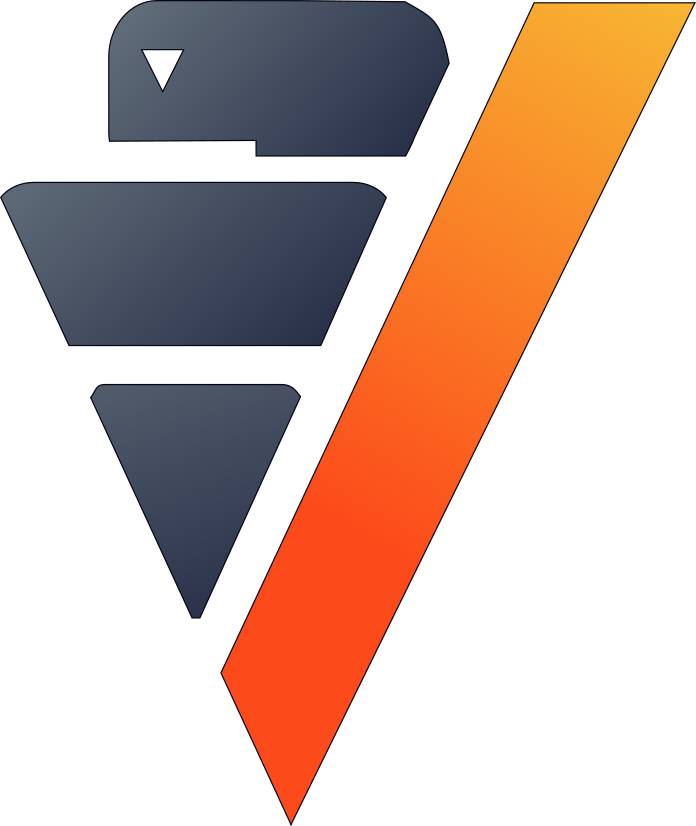

In [15]:
expedia.memory_usage()

The vDataFrame only uses about 37KB! By storing the data in the Vertica database, and only recording the user's data modifications in memory, the memory usage is reduced to a minimum. 

With VerticaPy, we can take advantage of Vertica's structure and scalability, providing fast queries without ever loading the data into memory. In the above examples, we've seen that in-memory processing is much more expensive in both computation and memory usage. This often leads to the decesion to downsample the data, which sacrfices the possibility of further data insights.

## The vDataFrame structure

Now that we've seen the performance and memory benefits of the vDataFrame, let's dig into some of the underlying structures and methods that produce these great results.

vDataFrames are composed of columns called vDataColumns. To view all vDataColumns in a vDataFrame, use the `get_columns()` method:

In [16]:
expedia.get_columns()

['"site_name"',
 '"posa_continent"',
 '"user_location_country"',
 '"user_location_region"',
 '"user_location_city"',
 '"orig_destination_distance"',
 '"user_id"',
 '"is_mobile"',
 '"is_package"',
 '"channel"',
 '"srch_adults_cnt"',
 '"srch_children_cnt"',
 '"srch_rm_cnt"',
 '"srch_destination_id"',
 '"srch_destination_type_id"',
 '"is_booking"',
 '"cnt"',
 '"hotel_continent"',
 '"hotel_country"',
 '"hotel_market"',
 '"hotel_cluster"']

To access a vDataColumn, specify the column name in square brackets, for example:

> **_NOTE:_** VerticaPy saves computed aggregations to avoid unncessary recomputations.

,value
name,"""is_booking"""
dtype,int
unique,2.0
count,37670293.0
0,34669600
1,3000693

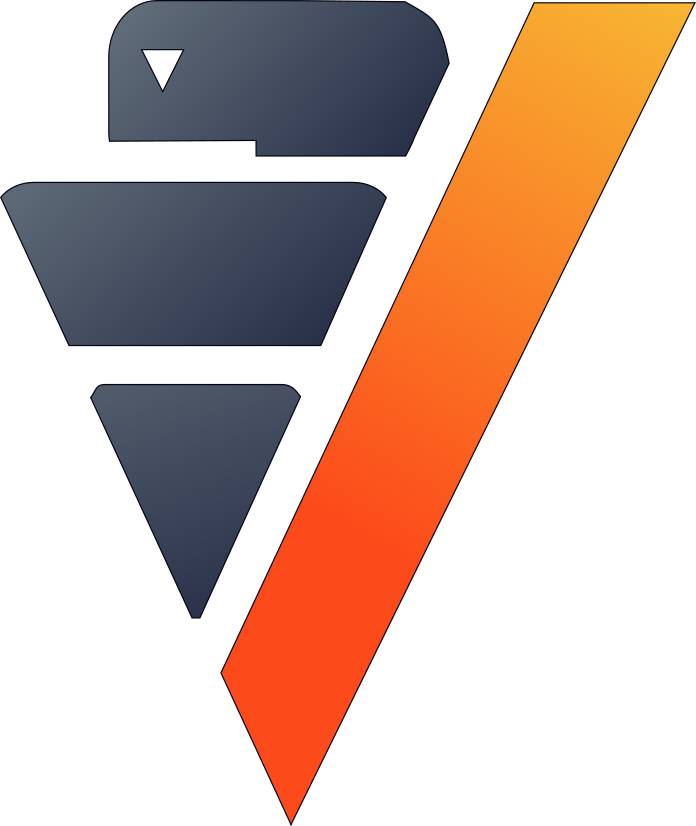

In [17]:
expedia["is_booking"].describe()

Each vDataColumn has its own catalog to save user modifications. In the previous example, we computed some aggregations for the `is_booking` column. Let's look at the catalog for that vDataColumn:

In [18]:
expedia["is_booking"]._catalog

{'cov': {},
 'pearson': {'"site_name"': -0.0103791330144224,
  '"posa_continent"': 0.00972436717006096,
  '"user_location_country"': 0.00752614887257535,
  '"user_location_region"': 0.00635166380501374,
  '"user_location_city"': 0.00222760096536968,
  '"orig_destination_distance"': -0.0377320625613809,
  '"user_id"': 0.00182006552590588,
  '"is_mobile"': -0.0307536571387009,
  '"is_package"': -0.0763467336220978,
  '"channel"': 0.0244378703859355,
  '"srch_adults_cnt"': -0.0490450028206689,
  '"srch_children_cnt"': -0.0222719630493467,
  '"srch_rm_cnt"': 0.0108395233625253,
  '"srch_destination_id"': 0.0249567593022902,
  '"srch_destination_type_id"': 0.0404728725370959,
  '"is_booking"': 1.0,
  '"cnt"': -0.112906513841061,
  '"hotel_continent"': -0.0261279829743103,
  '"hotel_country"': -0.00394808105853647,
  '"hotel_market"': 0.0119576115952104,
  '"hotel_cluster"': -0.021548065656294},
 'spearman': {},
 'spearmand': {},
 'kendall': {},
 'cramer': {},
 'biserial': {},
 'regr_avgx': 

The catalog is updated whenever major changes are made to the data.

We can also view the vDataFrame's backend SQL code generation by setting the `sql_on` parameter to True with the `set_option()` function:

,value
name,"""cnt"""
dtype,int
unique,103.0
count,37670293
mean,1.48338392271067
std,1.21977557865588
min,1.0
approx_25%,1.0
approx_50%,1.0
approx_75%,2.0

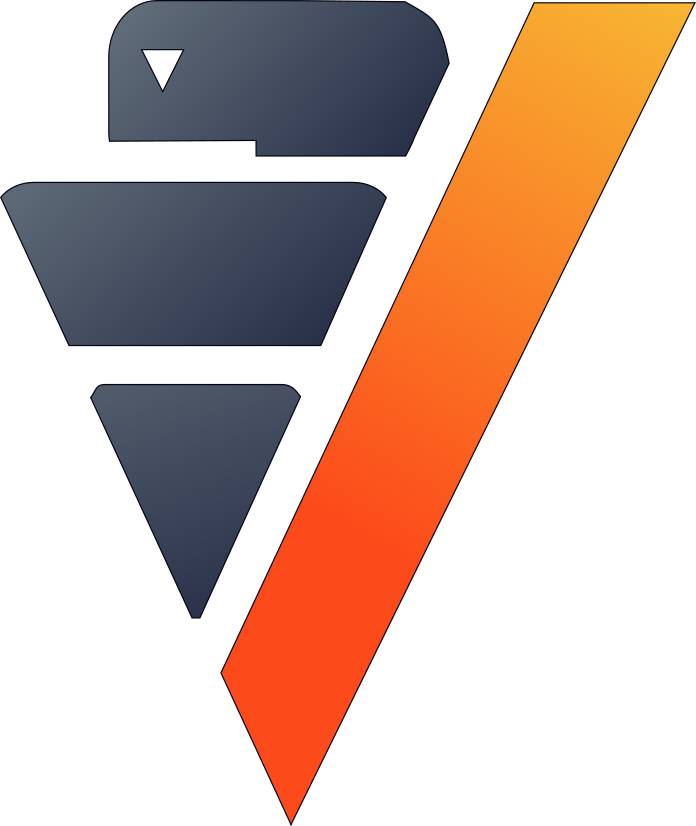

In [19]:
vp.set_option("sql_on", True)
expedia["cnt"].describe()

To control whether each query outputs its elasped time, use the `time_on` parameter of the `set_option()` function:

> **_NOTE:_** To display matplotlib graphics in Jupyter, you must use the '%matplotlib inline' command the first time you draw a graphic.

In [20]:
expedia = vp.vDataFrame("public.train") # creating a new vDataFrame to delete the catalog 
vp.set_option("time_on", True)
expedia.corr()

The aggregation's for each vDataColumn are saved to its catalog. If we again call the `corr()` method, it'll complete in a couple seconds—the time needed to draw the graphic—because the aggregations have already been computed and saved during the last call:

In [22]:
start_time = time.time()
expedia.corr()
print("elapsed time = {}".format(time.time() - start_time))

elapsed time = 23.79699158668518


To turn off the elapsed time and the SQL code generation options:

In [23]:
vp.set_option("sql_on", False)
vp.set_option("time_on", False)

You can obtain the current vDataFrame relation with the `current_relation()` method:

In [24]:
print(expedia.current_relation())

"public"."train"


The generated SQL for the relation changes according to the user's modifications. For example, if we impute the missing values of the `orig_destination_distance` vDataColumn by its average and then drop the `is_package` vDataColumn, these changes are reflected in the relation:

In [25]:
expedia["orig_destination_distance"].fillna(method = "avg")
expedia["is_package"].drop()
print(expedia.current_relation())

13525001 elements were filled.
(
   SELECT
     "date_time",
     "site_name",
     "posa_continent",
     "user_location_country",
     "user_location_region",
     "user_location_city",
     COALESCE("orig_destination_distance", 1970.0900267207) AS "orig_destination_distance",
     "user_id",
     "is_mobile",
     "channel",
     "srch_ci",
     "srch_co",
     "srch_adults_cnt",
     "srch_children_cnt",
     "srch_rm_cnt",
     "srch_destination_id",
     "srch_destination_type_id",
     "is_booking",
     "cnt",
     "hotel_continent",
     "hotel_country",
     "hotel_market",
     "hotel_cluster" 
   FROM
 (
                
   SELECT
     
                    "date_time",
     "site_name",
     "posa_continent",
     "user_location_country",
     "user_location_region",
     "user_location_city",
     "orig_destination_distance",
     "user_id",
     "is_mobile",
     "channel",
     "srch_ci",
     "srch_co",
     "srch_adults_cnt",
     "srch_children_cnt",
     "srch_rm_cnt

Notice that the `is_package` column has been removed from the SELECT statement and the `orig_destination_distance` is now using a COALESCE SQL function.

## vDataFrame attributes and management

The vDataFrame has many attributes and methods, some of which were demonstrated in the above examples. vDataFrames have two types of attributes:

- Virtual Columns (vDataColumn)
- Main attributes (columns, main_relation ...)

The vDataFrame's main attributes are stored in the `_vars` dictionary:

> **_NOTE:_** You should never change these attributes manually.

In [26]:
expedia._vars

{'allcols_ind': 24,
 'count': 37670293,
 'clean_query': True,
 'exclude_columns': [],
 'history': ['{Wed Jan 10 14:39:26 2024} [Fillna]: 13525001 "orig_destination_distance" missing values were  filled.',
  '{Wed Jan 10 14:39:26 2024} [Drop]: vDataColumn "is_package" was deleted from the vDataFrame.'],
 'isflex': False,
 'max_columns': -1,
 'max_rows': -1,
 'order_by': {},
 'saving': [],
 'sql_push_ext': False,
 'sql_magic_result': 0,
 'symbol': '$',
 'where': [],
 'has_dpnames': False,
 'columns': ['"date_time"',
  '"site_name"',
  '"posa_continent"',
  '"user_location_country"',
  '"user_location_region"',
  '"user_location_city"',
  '"orig_destination_distance"',
  '"user_id"',
  '"is_mobile"',
  '"channel"',
  '"srch_ci"',
  '"srch_co"',
  '"srch_adults_cnt"',
  '"srch_children_cnt"',
  '"srch_rm_cnt"',
  '"srch_destination_id"',
  '"srch_destination_type_id"',
  '"is_booking"',
  '"cnt"',
  '"hotel_continent"',
  '"hotel_country"',
  '"hotel_market"',
  '"hotel_cluster"'],
 'main_

## vDataFrame data types

vDataFrames use the data types of its vDataColumns. The behavior of some vDataFrame methods depend on the data type of the columns.
For example, computing a histogram for a numerical data type is not the same as computing a histogram for a categorical data type. 

The vDataFrame identifies four main data types:
- `int`: integers are treated like categorical data types when their cardinality is low; otherwise, they are considered numeric
- `float`: numeric data types
- `date`: date-like data types (including timestamp)
- `text`: categorical data types
 
Data types not included in the above list are automatically treated as categorical. You can examine the data types of the vDataColumns in a vDataFrame using the `dtypes()` method:

,dtype
"""date_time""",timestamp
"""site_name""",int
"""posa_continent""",int
"""user_location_country""",int
"""user_location_region""",int
"""user_location_city""",int
"""orig_destination_distance""",float
"""user_id""",int
"""is_mobile""",int
"""channel""",int

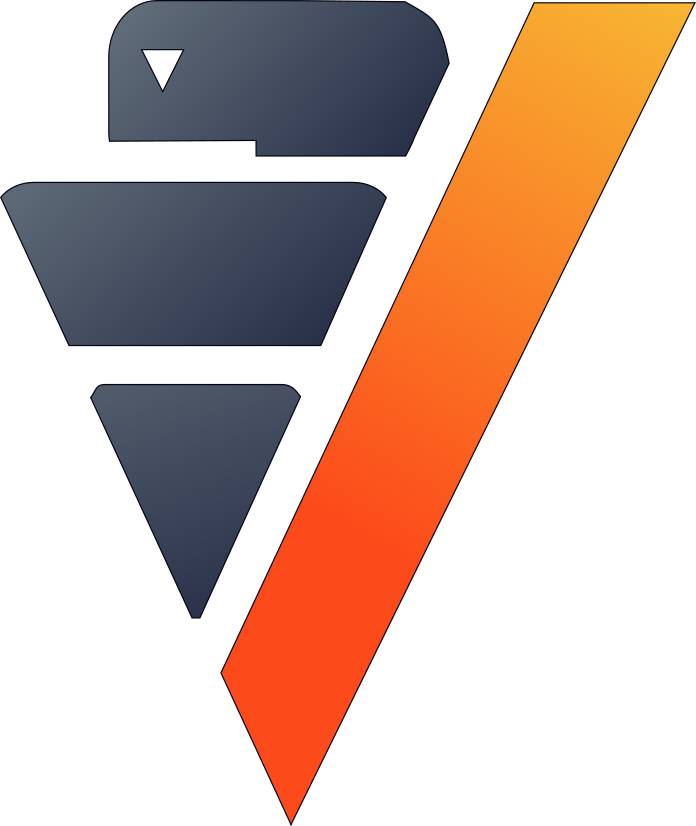

In [27]:
expedia.dtypes()

To convert the data type of a vDataColumn, use the `astype()` method:

In [28]:
expedia["hotel_market"].astype("varchar")
expedia["hotel_market"].ctype()

'varchar'

To view the category of a specific vDataColumn, specify the vDataColumn and use the `category()` method:

In [29]:
expedia["hotel_market"].category()

'text'

## Exporting, saving, and loading vDataFrames

The `save()` and `load()` functions allow you to save and load vDataFrames:

34669600 elements were filtered.


,📅date_timeTimestamp(29),123site_nameInteger,123posa_continentInteger,123user_location_countryInteger,123user_location_regionInteger,123user_location_cityInteger,123orig_destination_distanceNumeric(19),123user_idInteger,123is_mobileInteger,123channelInteger,📅srch_ciDate,📅srch_coDate,123srch_adults_cntInteger,123srch_children_cntInteger,123srch_rm_cntInteger,123srch_destination_idInteger,123srch_destination_type_idInteger,123is_bookingInteger,123cntInteger,123hotel_continentInteger,123hotel_countryInteger,Abchotel_marketVarchar(20),123hotel_clusterInteger
1,2013-01-07 00:41:02,24,2,3,51,9527,1970.0900267207,259991,0,1,2013-05-05,2013-05-06,1,0,1,23507,6,1,1,6,70,19,9
2,2013-01-07 00:59:56,24,2,3,50,5703,1970.0900267207,486892,0,3,2013-02-08,2013-02-10,2,1,1,8746,1,1,1,6,105,29,43
3,2013-01-07 01:14:19,2,3,35,177,33543,2650.4725,119414,0,9,2013-01-17,2013-01-19,1,0,1,18788,1,1,1,5,203,253,61
4,2013-01-07 01:26:37,2,3,229,407,16373,1970.0900267207,217610,0,9,2013-01-08,2013-01-11,1,0,1,12014,1,1,1,2,50,644,15
5,2013-01-07 01:27:19,2,3,66,174,14752,342.9899,1043452,0,9,2013-03-01,2013-03-02,2,0,1,8279,1,1,1,2,50,1230,83
6,2013-01-07 02:09:57,2,3,235,13,53632,1970.0900267207,627910,0,9,2013-01-17,2013-01-18,1,0,1,15655,5,1,1,3,1,142,38
7,2013-01-07 03:26:29,2,3,66,348,48862,1100.7225,961860,0,9,2013-02-14,2013-02-20,2,2,2,11373,1,1,1,4,128,1455,69
8,2013-01-07 04:17:26,2,3,0,317,56136,7872.7567,438592,0,9,2013-01-23,2013-01-25,2,1,1,8273,1,1,1,2,50,660,94
9,2013-01-07 04:39:20,2,3,50,706,7736,1970.0900267207,1093463,0,1,2013-03-29,2013-03-30,2,0,1,952,3,1,1,3,89,811,67
10,2013-01-07 04:52:59,2,3,66,254,45890,143.3024,1164465,0,0,2013-09-14,2013-09-15,1,0,5,27671,1,1,1,2,50,424,50

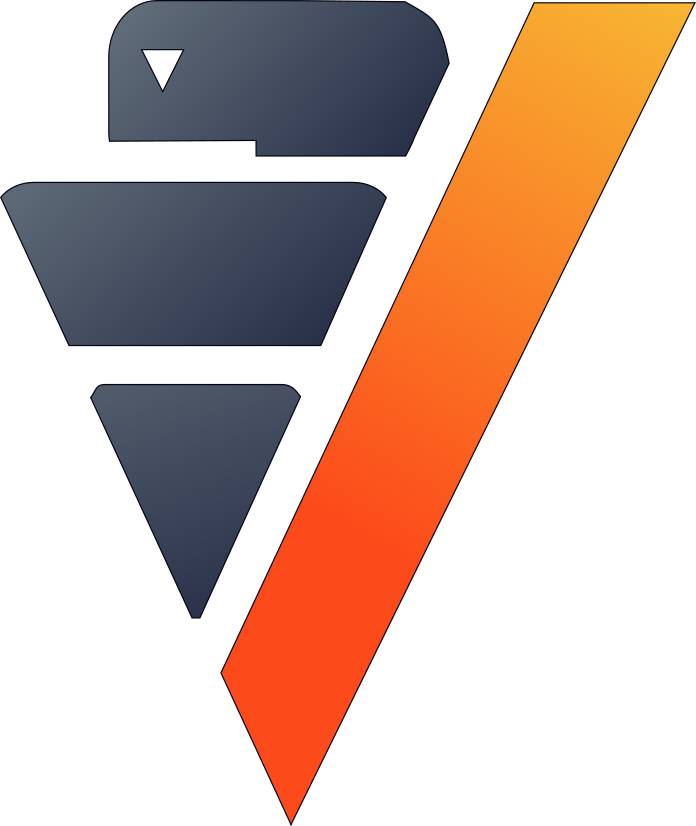

In [30]:
expedia.save()
expedia.filter("is_booking = 1")

To return a vDataFrame to a previously saved structure, use the `load()` function:

In [31]:
expedia = expedia.load()
print(expedia.shape())

(37670293, 23)


> **Tip:** For more information about a function, use the help() function

Because vDataFrames are views of data stored in the connected Vertica database, any modifications made to the vDataFrame are not reflected in the underlying data in the database. To save a vDataFrame's relation to the database, use the `to_db()` method.

It's good practice to examine the expected disk usage of the vDataFrame before exporting it to the database:

100%|██████████| 2/2 [00:03<00:00,  1.74s/it]


,expected_size (Gb),max_size (Gb),type
"""date_time""",7.450580596923828e-09,0.2806655541062355,timestamp
"""site_name""",0.047050174325704575,0.2806655541062355,int
"""posa_continent""",0.03508319426327944,0.2806655541062355,int
"""user_location_country""",0.07453343831002712,0.2806655541062355,int
"""user_location_region""",0.09974934346973896,0.2806655541062355,int
"""user_location_city""",0.16734247468411922,0.2806655541062355,int
"""orig_destination_distance""",7.450580596923828e-09,0.2806655541062355,float
"""user_id""",0.21339667681604624,0.2806655541062355,int
"""is_mobile""",0.03508319426327944,0.2806655541062355,int
"""channel""",0.03508897125720978,0.2806655541062355,int

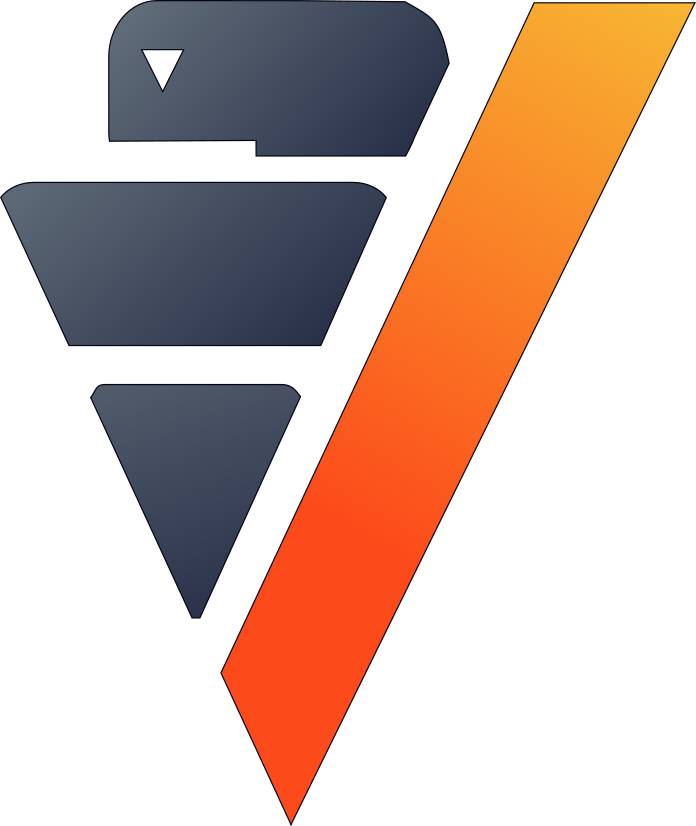

In [33]:
expedia.expected_store_usage(unit = "Gb")

If you decide that there is sufficient space to store the vDataFrame in the database, run the `to_db()` method:

In [ ]:
expedia.to_db("public.expedia_clean",
              relation_type = "table")